# _**<span style="color:#1F618D;"> Mathematical Optimization in Support Vector Machines</span>**_

<span style="color:#148F77;">Author: Blaise Appolinary</span>
Github Account : [https://github.com/Blaise143](https://github.com/Blaise143)
******

<a id="table-of-contents"></a>
# **<span style="color:#1F618D;">📓 Table of Contents 📓</span>**
- [1. Introduction](#1)
- [2. Support Vector Machines Overview](#2)
- [3. Mathematical Programming Model Formulation](#3)
- [4. Hard Margin Support Vector Machines In Practice](#4)

<a id="1"></a>
## <span style="color:#1F618D;">Introduction</span>

Machine Learning has been a very fast-growing area of Computer science, Mathematics and Statistics. One of the most effective and popular machine learning algorithms is the `Support Vector Machine`. Support Vector machines uses mathematical programming to formulate a classification model. In this notebook I will give an overview on the support vector machines classification algorithm, detail how mathematical programming is used in it, derive the optimization problem and, using the scikit-learn python library, show an example on how it can be used in practice.

The main idea of Support vector machines is to insert a hyperplane (which is basically a decision boundary) that separates classes the most. It does this by finding a hyperplane with the highest `margin`. A margin is the distance between the closest point between a class and a hyperplane. The optimization problem in SVM is finding such a hyperplane that maximizes the margin between the classes.
***
<a id="2"></a>
## <span style="color:#1F618D;">Support Vector Machines Overview</span>
Given a dataset with a number of classes, suppose we want to come up with a classification algorithm. For simplicity, let us assume that :
- We are given two classes of data points
- The two classes are linearly separable, meaning that you can separate them by drawing a line in between them.
**Note**: a support vector machine that work on datapoints that are linearly separable is called a `Hard Margin Support Vector Machine`. This is the kind of SVM that I will talk about in this notebook.

The image below shows an example of a linearly separable classes.

<img src="images/image_1.png" height ="300">



Note that, one way to separate these two classes would be to draw a line in between them. The image below shows three possible ways we could separate these two classes by a line.
<img src="images/image_2.png" height="300">

There are infinitely many lines that can be drawn to separate these two classes. However, arbitrarily picking a line that separates these two classes with a 100% accuracy rate might not be good enough. This is because, a bad choice of a decision boundary might lead to **overfitting**. This means that, the decision boundary might not generalize well on out-of-sample datapoints. So how do we choose a line that serves as the best possible decision boundary? SVM attempts to choose the optimal way to separate the classes by finding a line (in 2d) or a hyperplane in n-dimensional data that separates the classes the most.
***
<a id="3"></a>
## <span style="color:#1F618D;">Mathematical Programming Model Formulation</span>
Before we dive into the details of the derivation of SVM, I will introduce some notations.

**Notations**:
Let there be $n$ datapoints belonging to two classes.
let $\{(x_i, y_i)\}$ where $i \in [1, n]$ be the set of pairs of datapoints $x_i$ and their corresponding labels $y_i$
let $y_i$ $\in$ $\{$-$1, $+$1\}$



Let $\beta^Tx+\beta_0=0$ be the equation of the hyperplane
it arises that: $\beta^Tx_1+\beta_0 =\beta^Tx_2+\beta_0=0$ for any two points $x_1$ and $x_2$ on the hyperplane.
This implies $$\beta^Tx_1 = \beta^Tx_2$$
$$\beta^T(x_1-x_2)=0$$
$$\beta \perp (x_1-x_2)$$

<img src="images/exhibit 1.png" height="300">



In other words, $\beta$ is orthogonal to the hyperplane.
***
 **FurtherMore**, for any point $x_0$ on the hyperplane, $$\beta^T x_0 + \beta_0=0$$ Hence: $$\beta_0 = -\beta^T x_0$$

Now, to calculate the distance of a point $x$ to the hyperplane, we can pick a point $x_0$ on the hyperplane, and use the a projection given by:
$$d=\frac{\beta^T(x-x_0)}{|\beta|} = \frac{\beta^Tx-\beta x_0}{|\beta|} = \frac{\beta^Tx+\beta_0}{|\beta|}$$

<img src="images/exhibit_2.png" height="300">

Thus, distance from any point $x_i$ to the hyperplane would be $d_i y_i$
Therefore, since the margin from a class to a hyperplane is the distance from the closest point to the hyperplane from a class,
Then: $$margin = min\{y_id_i\} = min\{\frac{y_i(\beta^Tx_i+\beta_0)}{|\beta|}\}, i \in [1,n]$$
***
**Note:** any point that is not on the hyperplane has a distance from the hyperplane greater than $0$. In other words:
$y_i(\beta^Tx_i+\beta_0) >0$ for any $(x_i, y_i)$ that is not on the hyperplane.

Therefore for some C, $$y_i(\beta^Tx_i+\beta_0) \geq C$$
$$ y_i (\frac{\beta^T}{C}x_i+\frac{\beta_0}{C}) \geq 1$$

This means that, we can scale $\beta$ such that the distance from any point to the hyperplane is at least 1.
Thus, since the margin is $min\{\frac{y_i(\beta^Tx_i+\beta_0)}{|\beta|}\}$, we can replace the numerator by 1 since we know that the we can alter $\beta$ in such a way that the minimum distance is 1.
Hence the margin from a class to the hyperplane would be dependent on $\beta$. It would be inversely proportional to $\beta$  $$ margin = \frac{1}{|\beta|}$$

***
Note that increasing $|\beta|$ decreses the margin. Therefore, **To maximize the margin**, we need to minimize $|\beta|$. Therefore, we can form an optimization problem that looks like this:

minimize $$|\beta|$$
subject to $$y_i(\beta^Tx_i + \beta_0) \geq 1$$

For convention, In SVM literature, the objective function is altered to be the L-2 norm. Giving us the **Optimization problem**:

Minimize $$\frac{1}{2}|\beta^T|^2$$
subject to     $$y_i(\beta^Tx_i + \beta_0) \geq 1$$
***
Now, having formulated the optimization problem, we note that this optimization problem can be made simpler to solve for by using the dual problem. I will not dive into the details of the process of the formulation of the dual from this primal but lagrangian multipliers to formulate the dual. For more information on duality and lagrangian multipliers, you can go to this [link](https://www.svm-tutorial.com/2016/09/duality-lagrange-multipliers/).

The dual optimization problem becomes:

maximize $$\sum \alpha_i - \frac{1}{2} \sum \alpha_i \alpha_j y_i y_j x^T_i x_j$$
subject to $$\alpha_i \geq 0$$ $$\sum \alpha_i y_i = 0$$
Note that:
 - $\alpha$ is the only unknown in this optimization problem.
 - solving for $\alpha$ will give us the optimal value of $\beta$ and in turn the equation of the hyperplane that best separates the two classes.
 - This is a quadratic programming problem
***


<a id="4"></a>
## <span style="color:#1F618D;">Hard Margin Support Vector Machines In Practice</span>
Having shown how hard margin support vector machines use mathematical programming, I will now use the Scikit-learn machine learning library on a famous dataset known as iris dataset to show how we would implement this algorithm on a classification task.
This dataset has attributes belonging to three different kinds of penguins.
For simplicity, I will remove one of the classes to remain with two classes in the dataset.

#### Importing necessary libraries and loading data

In [34]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = load_iris(as_frame=True)["frame"]
mask = data["target"] != 2
data = data[mask]
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualizing the attributes

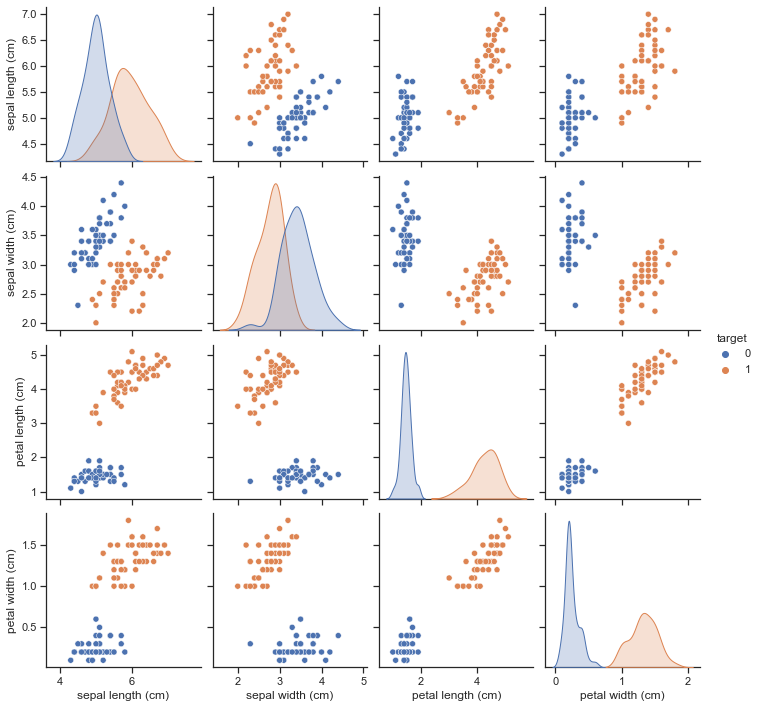

In [35]:
sns.set_theme(style="ticks")
sns.pairplot(data, hue="target");
plt.grid()

For simplicity, I will focus on two attributes namely **petal length** and **petal width**

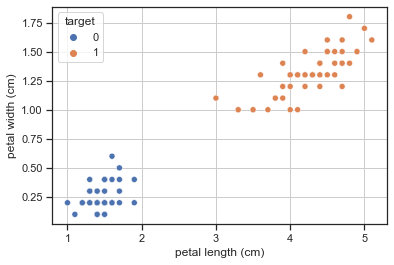

In [36]:
df = data[["petal length (cm)", "petal width (cm)", "target"]]
plt.grid()
sns.scatterplot(data=df, x="petal length (cm)", y ="petal width (cm)", hue="target");

As we can see, this dataset looks linearly separable. Therefore, a hard margin support vector machine can work brilliantly. Our goal is to come up with a decision boundary that separates these two classes the best.

In [37]:
# Splittinng dataset into attributes and target variables
X, y = df[["petal length (cm)", "petal width (cm)"]] , df['target']

from sklearn.svm import SVC

# Fitting model onto the data
classifier = SVC(kernel="linear")
classifier.fit(X, y)

SVC(kernel='linear')

## Plotting the hyperplane from the fitted SVM
Having fitted on an **SVM** on the data, the code cell below shows the line that separates the two classes the most.

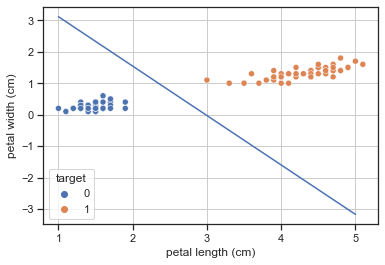

In [38]:
sns.scatterplot(data=df, x="petal length (cm)", y ="petal width (cm)", hue="target")
w = classifier.coef_[0]
b = classifier.intercept_[0]
x_points = np.linspace(1, 5)
y_points = -(w[0] / w[1]) * x_points - b / w[1]
plt.grid()
plt.plot(x_points, y_points, c='b');